# **I. First Task(improved version) : Data Preprocessing** 

The different steps followed for this first task are:
1. Data Cleaning
2. Data Encoding
3. Data Labeling

# Librairies

In [1]:
#!pip install --upgrade category_encoders
#!pip install seaborn

In [2]:
# data manipulation
import pandas as pd
from pandas.api.types import is_numeric_dtype
import numpy as np
import seaborn as sns
import datetime

# data preprocessing & engineering
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
#from category_encoders import BinaryEncoder

# settings & warning handling
import warnings
pd.options.display.max_columns
warnings.filterwarnings("always")
warnings.filterwarnings("ignore")


# First Look at the data

In [3]:
# read in csv file as a DataFrame
data = pd.read_csv("LoanExport.csv")

In [4]:
# explore the first 5 rows
data.head()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
0,0,199902,N,202901,16974,25,1,O,89,27,...,60400,F199Q1268030,P,360,2,FL,WASHINGTONMUTUALBANK,0,0,52
1,0,199902,N,202901,19740,0,1,O,73,17,...,80200,F199Q1015092,N,360,1,FT,CHASEHOMEFINANCELLC,0,0,144
2,0,199902,N,202901,29940,0,1,O,75,16,...,66000,F199Q1266886,N,360,2,FL,WASHINGTONMUTUALBANK,0,0,67
3,0,199902,N,202901,31084,0,1,O,76,14,...,90700,F199Q1178167,N,360,2,GM,GMACMTGECORP,0,0,35
4,0,199902,N,202901,35644,0,1,O,78,18,...,7600,F199Q1178517,N,360,2,GM,GMACMTGECORP,0,0,54


In [5]:
# explore the last 5 rows
data.tail()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
291446,839,199903,N,202902,37964,0,1,O,60,32,...,19400,F199Q1220925,N,360,2,Ot,Other servicers,0,0,12
291447,840,200210,N,202904,35644,0,1,O,73,0,...,11600,F199Q1401332,P,319,2,Ot,Other servicers,0,0,53
291448,840,200304,N,202904,42044,0,1,O,73,31,...,92800,F199Q1401282,N,313,1,Ot,Other servicers,0,0,38
291449,845,199904,N,202903,37964,0,1,I,80,54,...,19300,F199Q1220924,P,360,2,Ot,Other servicers,0,0,32
291450,849,199903,N,202902,37964,0,1,O,47,29,...,18900,F199Q1220923,P,360,2,Ot,Other servicers,0,0,29


In [6]:
# size of the dataset
data.shape

(291451, 28)

In [7]:
# checking the columns names
data.columns

Index(['CreditScore', 'FirstPaymentDate', 'FirstTimeHomebuyer', 'MaturityDate',
       'MSA', 'MIP', 'Units', 'Occupancy', 'OCLTV', 'DTI', 'OrigUPB', 'LTV',
       'OrigInterestRate', 'Channel', 'PPM', 'ProductType', 'PropertyState',
       'PropertyType', 'PostalCode', 'LoanSeqNum', 'LoanPurpose',
       'OrigLoanTerm', 'NumBorrowers', 'SellerName', 'ServicerName',
       'EverDelinquent', 'MonthsDelinquent', 'MonthsInRepayment'],
      dtype='object')

In [8]:
# looking for more infos about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291451 entries, 0 to 291450
Data columns (total 28 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CreditScore         291451 non-null  int64  
 1   FirstPaymentDate    291451 non-null  int64  
 2   FirstTimeHomebuyer  291451 non-null  object 
 3   MaturityDate        291451 non-null  int64  
 4   MSA                 291451 non-null  object 
 5   MIP                 291451 non-null  int64  
 6   Units               291451 non-null  int64  
 7   Occupancy           291451 non-null  object 
 8   OCLTV               291451 non-null  int64  
 9   DTI                 291451 non-null  int64  
 10  OrigUPB             291451 non-null  int64  
 11  LTV                 291451 non-null  int64  
 12  OrigInterestRate    291451 non-null  float64
 13  Channel             291451 non-null  object 
 14  PPM                 291451 non-null  object 
 15  ProductType         291451 non-nul

# 1. Data Cleaning

## 1.1. Parsing Dates

###  - FirstPaymentDate : 
The month and year that the first scheduled payment on the loan is due.

In [9]:
data.FirstPaymentDate.tail()

291446    199903
291447    200210
291448    200304
291449    199904
291450    199903
Name: FirstPaymentDate, dtype: int64

These values are dates but Python doesn't know that they're dates because the dtype is 'int64'.

In [10]:
data['FirstPaymentDate'].dtype

dtype('int64')

In [11]:
# let's first separate year from month
data['FirstPaymentDate'] = data['FirstPaymentDate'].apply(lambda x: str(x)[:4] + '-' + str(x)[4:]) #.astype('str')
data['FirstPaymentDate'].tail()

291446    1999-03
291447    2002-10
291448    2003-04
291449    1999-04
291450    1999-03
Name: FirstPaymentDate, dtype: object

In [12]:
data['FirstPayment_Year']  = data['FirstPaymentDate'].apply(lambda x: str(x)[:4]).astype('object')
data['FirstPayment_Month'] = data['FirstPaymentDate'].apply(lambda x: str(x)[-2:]).astype('object')

Then let's convert this object column to datetime. This is called "Parsing Dates", i.e., we're taking in a string and identifying its components parts. The format of dates are determined with a guide called "strftime". The most common parts of date are : 
- %d for day, 
- %m for month,
- %y for two-digit year,
- %Y for 4 digit year.

In [13]:
# create new colum for parsed date
data['Parsed_FirstPaymentDate'] = pd.to_datetime(data['FirstPaymentDate'], format="%Y-%m")
data['Parsed_FirstPaymentDate'].tail()

291446   1999-03-01
291447   2002-10-01
291448   2003-04-01
291449   1999-04-01
291450   1999-03-01
Name: Parsed_FirstPaymentDate, dtype: datetime64[ns]

Now we can see that the column dtype is datetime64[ns] :)

### - MaturityDate: 
The month and year that the final scheduled payment on the loan is due.  
**We'll apply same process of date parsing as above for the 'FirstPaymentDate' column.**


In [14]:
# let's first separate year from month
data['MaturityDate'] = data['MaturityDate'].apply(lambda x: str(x)[:4] + '-' + str(x)[4:]) #.astype('str')
data['MaturityDate'].tail()

291446    2029-02
291447    2029-04
291448    2029-04
291449    2029-03
291450    2029-02
Name: MaturityDate, dtype: object

In [15]:
data['Maturity_Year']  = data['MaturityDate'].apply(lambda x: str(x)[:4]).astype('object')
data['Maturity_Month'] = data['MaturityDate'].apply(lambda x: str(x)[-2:]).astype('object')

In [16]:
# create new colum for parsed date
data['Parsed_MaturityDate'] = pd.to_datetime(data['MaturityDate'], format="%Y-%m")
data['Parsed_MaturityDate'].tail()

291446   2029-02-01
291447   2029-04-01
291448   2029-04-01
291449   2029-03-01
291450   2029-02-01
Name: Parsed_MaturityDate, dtype: datetime64[ns]

## 1.2. Missing values treatment

In [17]:
# missing values in descending order
data.isnull().sum().sort_values(ascending=False)

SellerName                 24994
CreditScore                    0
EverDelinquent                 0
LoanSeqNum                     0
LoanPurpose                    0
OrigLoanTerm                   0
NumBorrowers                   0
ServicerName                   0
MonthsDelinquent               0
FirstPaymentDate               0
MonthsInRepayment              0
FirstPayment_Year              0
FirstPayment_Month             0
Parsed_FirstPaymentDate        0
Maturity_Year                  0
Maturity_Month                 0
PostalCode                     0
PropertyType                   0
PropertyState                  0
ProductType                    0
PPM                            0
Channel                        0
OrigInterestRate               0
LTV                            0
OrigUPB                        0
DTI                            0
OCLTV                          0
Occupancy                      0
Units                          0
MIP                            0
MSA       

We see that according to the isnull() function, only "SellerName" has missing values.  

However after reading carefully the variable description it seems that others columns have missing values. Indeed some columns values are marked as "Not Available" or 999. 
We can also observe that some columns have "X" values and are in object form as well as some columns should be of an integer type but are of an object type. Now let us detect which columns have these "X" values and if there are any other symbols too.

In [18]:
for col in data.columns:
    print('{} : {}\n'.format(col,data[col].unique()))
    print('-'*100)
    print('\n')

CreditScore : [  0 335 342 363 366 370 375 391 396 445 462 466 471 476 477 478 479 481
 482 483 485 486 487 489 490 491 492 493 494 495 496 497 498 499 500 501
 502 503 504 505 506 507 508 509 510 511 512 513 514 515 516 517 518 519
 520 521 522 523 524 525 526 527 528 529 530 531 532 533 534 535 536 537
 538 539 540 541 542 543 544 545 546 547 548 549 550 551 552 553 554 555
 556 557 558 559 560 561 562 563 564 565 566 567 568 569 570 571 572 573
 574 575 576 577 578 579 580 581 582 583 584 585 586 587 588 589 590 591
 592 593 594 595 596 597 598 599 600 601 602 603 604 605 606 607 608 609
 610 611 612 613 614 615 616 617 618 619 620 621 622 623 624 625 626 627
 628 629 630 631 632 633 634 635 636 637 638 639 640 641 642 643 644 645
 646 647 648 649 650 651 652 653 654 655 656 657 658 659 660 661 662 663
 664 665 666 667 668 669 670 671 672 673 674 675 676 677 678 679 680 681
 682 683 684 685 686 687 688 689 690 691 692 693 694 695 696 697 698 699
 700 701 702 703 704 705 706 707 708 

LoanSeqNum : ['F199Q1268030' 'F199Q1015092' 'F199Q1266886' ... 'F199Q1401282'
 'F199Q1220924' 'F199Q1220923']

----------------------------------------------------------------------------------------------------


LoanPurpose : ['P' 'N' 'C']

----------------------------------------------------------------------------------------------------


OrigLoanTerm : [360 345 306 335 322 327 329 358 355 356 354 346 350 334 325 344 348 313
 316 336 359 318 353 330 319 332 315 320 338 312 328 337 351 333 317 331
 357 341 343 326 339 324 347 352 307 309 349 342 304 310 323 340 301 305
 314 321 302 308 303 361 311]

----------------------------------------------------------------------------------------------------


NumBorrowers : ['2' '1' 'X ']

----------------------------------------------------------------------------------------------------


SellerName : ['FL' 'FT' 'GM' 'Ot' 'RE' 'NO' 'ST' 'CR' 'CH' 'FI' 'HO' 'PR' nan 'PN' 'WA'
 'BA' 'G ' 'OL' 'AC' 'CO' 'BI']

-------------------------------

### Summury of Missing Values Analysis

In [19]:

def summary_missing_values(df):
    output_df = pd.DataFrame(columns=['is_Numeric', 'has_X_values?', 'Conditions', 'Column_Description'])
    
    output_df.loc['CreditScore']        = [is_numeric_dtype(df['CreditScore']), 'False', "Scores <300 or >850 are “Not Available”", "The standardized credit score used to evaluate the borrower during the loan origination process." ]
    output_df.loc['FirstTimeHomebuyer'] = [is_numeric_dtype(df['FirstTimeHomebuyer']), 'True', "9 = Not Available", "The indicator denoting whether a borrower on the loan qualifies as a first-time homebuyer." ]
    output_df.loc['MSA']                = [is_numeric_dtype(df['MSA']), 'True', "None", "Mortgage Security Amount" ]
    output_df.loc['MIP']                = [is_numeric_dtype(df['MIP']), 'False', "MIP values > 55% will be disclosed as “Not Available”. 000= No MI; 999= Not Available", "The percentage of mortgage insurance coverage obtained at origination in effect at the time the security was issued." ]
    output_df.loc['Units']              = [is_numeric_dtype(df['Units']), 'False', "99 = Not Available", "The number of dwelling units in the mortgaged property at the time the loan was originated: 1, 2, 3 or 4." ]
    output_df.loc['Occupancy']          = [is_numeric_dtype(df['Occupancy']), 'False', "None", "The classification describing the property occupancy status at the time the loan was originated." ]
    output_df.loc['OCLTV']              = [is_numeric_dtype(df['OCLTV']), 'False', "99 = Not Available", "The ratio, expressed as a percentage, obtained by dividing the amount of all known outstanding loans at origination by the value of the property." ]
    output_df.loc['DTI']                = [is_numeric_dtype(df['DTI']), 'False', "Percentages < 1% or > 65% will be disclosed as “Not Available,”", "The ratio obtained by dividing the total monthly debt expense by the total monthly income of the borrower at the time the loan was originated or modified. " ]
    output_df.loc['LTV']                = [is_numeric_dtype(df['LTV']), 'False', "Percentages < 1% or > than 998% will be disclosed as “Not Available,”. 999 = Not Available.", "The ratio, expressed as a percentage, obtained by dividing the amount of the loan at origination by the value of the property. " ]
    output_df.loc['OrigInterestRate']   = [is_numeric_dtype(df['OrigInterestRate']), 'False', "If value <0 or >25, then the rate is considered not available", "The interest rate of the loan as stated on the note at the time the loan was originated."]
    output_df.loc['Channel']            = [is_numeric_dtype(df['Channel']), 'False', "9 = Not Available", "The origination channel used by the party that delivered the loan to the issuer." ]
    output_df.loc['PPM']                = [is_numeric_dtype(df['PPM']), 'True', "9 = Not Available", "The indicator denoting whether the borrower is subject to a penalty for early payment of principal." ]
    output_df.loc['PropertyType']       = [is_numeric_dtype(df['PropertyType']), 'True', "None", "The classification describing the type of property that secures the loan." ]
    output_df.loc['PostalCode']         = [is_numeric_dtype(df['PostalCode']), 'True', "None", "-" ]
    output_df.loc['NumBorrowers']       = [is_numeric_dtype(df['NumBorrowers']), 'True', "99 = Not Available", "The number of borrowers who, at the time the loan was originated, are obligated to repay the loan: 1, 2, 3, 4, 5, 6, 7, 8, 9, 10. " ]
    output_df.loc['SellerName']         = [is_numeric_dtype(df['SellerName']), 'False', "None", "The name of the entity that sold the loan to the issuer." ]
    output_df.loc['ServicerName']       = [is_numeric_dtype(df['ServicerName']), 'False', "None", "The name of the entity that services the loan during the current reporting period." ]
    output_df.loc['EverDelinquent']     = [is_numeric_dtype(df['EverDelinquent']), 'False', "None", "Target column" ]
    output_df.loc['MonthsDelinquent']   = [is_numeric_dtype(df['MonthsDelinquent']), 'False', "9 = Not Available", "The number of days for which a mortgage loan has been reported delinquent." ]
    output_df.loc['MonthsInRepayment']  = [is_numeric_dtype(df['MonthsInRepayment']), 'False', "None", "-" ]
    #output_df.loc[''] = [is_numeric_dtype(df['']), 'False', "9 = Not Available", "" ]
    
    return output_df
    
pd.set_option('display.max_colwidth', None)
summary_missing_values(data)

,is_Numeric,has_X_values?,Conditions,Column_Description
CreditScore,True,False,Scores <300 or >850 are “Not Available”,The standardized credit score used to evaluate the borrower during the loan origination process.
FirstTimeHomebuyer,False,True,9 = Not Available,The indicator denoting whether a borrower on the loan qualifies as a first-time homebuyer.
MSA,False,True,None,Mortgage Security Amount
MIP,True,False,MIP values > 55% will be disclosed as “Not Available”. 000= No MI; 999= Not Available,The percentage of mortgage insurance coverage obtained at origination in effect at the time the security was issued.
Units,True,False,99 = Not Available,"The number of dwelling units in the mortgaged property at the time the loan was originated: 1, 2, 3 or 4."
Occupancy,False,False,None,The classification describing the property occupancy status at the time the loan was originated.
OCLTV,True,False,99 = Not Available,"The ratio, expressed as a percentage, obtained by dividing the amount of all known outstanding loans at origination by the value of the property."
DTI,True,False,"Percentages < 1% or > 65% will be disclosed as “Not Available,”",The ratio obtained by dividing the total monthly debt expense by the total monthly income of the borrower at the time the loan was originated or modified.
LTV,True,False,"Percentages < 1% or > than 998% will be disclosed as “Not Available,”. 999 = Not Available.","The ratio, expressed as a percentage, obtained by dividing the amount of the loan at origination by the value of the property."
OrigInterestRate,True,False,"If value <0 or >25, then the rate is considered not available",The interest rate of the loan as stated on the note at the time the loan was originated.


In [20]:
columns_with_X_values = ['FirstTimeHomebuyer', 'MSA', 'PPM', 'PropertyType', 'PostalCode', 'NumBorrowers']
def replace_X_values_by_nan(data):
    data.loc[data['FirstTimeHomebuyer'] == 'X', 'FirstTimeHomebuyer'] = np.nan
    data.loc[data['MSA'] == 'X    ', 'MSA']                           = np.nan
    data.loc[data['PPM'] == 'X', 'PPM']                               = np.nan
    data.loc[data['PropertyType'] == 'X ' , 'PropertyType']           = np.nan
    data.loc[data['PostalCode'] == 'X    ' , 'PostalCode']            = np.nan
    data.loc[data['NumBorrowers'] == 'X ' , 'NumBorrowers']           = np.nan
    
    return data

data = replace_X_values_by_nan(data)

In [21]:
for col in columns_with_X_values:
    print('{} : {}\n'.format(col, data[col].unique()))
    print('-'*100)
    print('\n')

FirstTimeHomebuyer : ['N' nan 'Y']

----------------------------------------------------------------------------------------------------


MSA : ['16974' '19740' '29940' '31084' '35644' nan '36740' '25540' '48620'
 '12060' '12420' '13140' '13644' '15764' '16700' '16940' '17900' '19124'
 '20500' '20764' '21340' '22380' '22744' '23060' '23104' '24660' '24860'
 '25060' '26900' '27060' '27140' '27260' '28420' '29404' '30780' '31340'
 '33124' '33340' '33460' '34820' '35004' '35084' '35380' '37100' '38060'
 '38300' '38900' '39300' '39340' '39820' '40060' '40140' '40900' '41180'
 '41620' '41700' '41740' '41884' '42044' '42220' '42644' '43900' '46060'
 '46700' '47644' '47894' '49180' '49420' '11340' '12100' '14500' '17820'
 '17860' '19340' '19804' '28140' '29740' '36084' '36500' '37460' '42060'
 '47260' '48424' '12580' '14484' '14860' '19380' '26420' '29420' '29620'
 '36540' '37764' '37860' '37964' '38940' '40380' '45300' '19660' '11300'
 '11460' '12220' '12940' '13820' '13980' '14740' '15540'

### Columns with particular Conditions

### - CreditScore  

In [22]:
# Checking conditions for "Not Available" values
data[(data['CreditScore'] < 300)]['CreditScore']

0       0
1       0
2       0
3       0
4       0
       ..
1184    0
1185    0
1186    0
1187    0
1188    0
Name: CreditScore, Length: 1189, dtype: int64

In [23]:
data[(data['CreditScore'] > 850) | (data['CreditScore'] == 9999)]['CreditScore']

Series([], Name: CreditScore, dtype: int64)

There are 1189 values of 'CreditScore' less than 300. 
So these values should be marqued as “Not Available” or 9999. We'll replace them by np.nan.

### - MIP: 

In [24]:
data[(data['MIP'] > 55) | (data['MIP'] == 999)]['MIP']

Series([], Name: MIP, dtype: int64)

### - Occupancy:  

In [25]:
data.Occupancy.value_counts()

O    276131
I      8734
S      6586
Name: Occupancy, dtype: int64

We have an unknown category in this column that is O. Probaly this column stands for “Not Available”. Let's consider these values as missing and replace them by np.nan.

### - DTI: 

In [26]:
data[(data.DTI < 1) | (data.DTI > 65) | (data.DTI == 999)].DTI

140       0
167       0
176       0
179       0
186       0
         ..
291438    0
291441    0
291442    0
291443    0
291447    0
Name: DTI, Length: 17796, dtype: int64

### - LTV: 

In [27]:
data[data.LTV < 1].LTV

31098     0
88463     0
233257    0
276981    0
287773    0
Name: LTV, dtype: int64

In [28]:
data[(data.LTV == 999) | (data.LTV > 998)].LTV

Series([], Name: LTV, dtype: int64)

### - OrigInterestRate:    

In [29]:
data[(data.OrigInterestRate < 0) | (data.OrigInterestRate > 25)].OrigInterestRate

Series([], Name: OrigInterestRate, dtype: float64)

In [30]:
def matching_description_conditions(data):
    # replacing all credit score values less than 300 by np.nan
    data.loc[data['CreditScore'] < 300, 'CreditScore'] = np.nan
    data.loc[data['DTI'] < 1, 'DTI'] = np.nan
    data.loc[data['LTV'] < 1, 'LTV'] = np.nan
    
    # replacing O by np.nan
    #data.loc[data['Occupancy'] == 'O', 'Occupancy'] = np.nan
    
    return data

data = matching_description_conditions(data)

### Missing values Imputation

In [31]:
# Now check missing values in descending order
data.isnull().sum().sort_values(ascending=False)

FirstTimeHomebuyer         78015
MSA                        39100
SellerName                 24994
DTI                        17796
PPM                         5405
CreditScore                 1189
NumBorrowers                 339
PropertyType                  22
PostalCode                     6
LTV                            5
OCLTV                          0
MIP                            0
Maturity_Month                 0
Maturity_Year                  0
Parsed_FirstPaymentDate        0
FirstPayment_Month             0
FirstPayment_Year              0
MonthsInRepayment              0
MonthsDelinquent               0
EverDelinquent                 0
ServicerName                   0
MaturityDate                   0
OrigLoanTerm                   0
Occupancy                      0
LoanPurpose                    0
LoanSeqNum                     0
FirstPaymentDate               0
PropertyState                  0
ProductType                    0
Units                          0
Channel   

<AxesSubplot:>

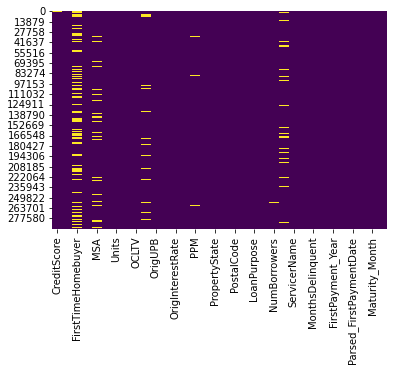

In [32]:
# Visualize missing values
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')

In [33]:
cols_to_impute_with_mode = ['FirstTimeHomebuyer', 'SellerName', 'PPM', 'PropertyType']
cols_to_impute_with_mean = ['MSA', 'DTI', 'CreditScore', 'NumBorrowers', 'LTV']

for col in cols_to_impute_with_mode:
    data[col].fillna(data[col].mode().iloc[0], inplace=True)
    
for col in cols_to_impute_with_mean:
    data[col] = pd.to_numeric(data[col])
    data[col].fillna(data[col].mean(), inplace=True)

In [34]:
# Now check missing values in descending order
data.isnull().sum().sort_values(ascending=False)

PostalCode                 6
EverDelinquent             0
LoanSeqNum                 0
LoanPurpose                0
OrigLoanTerm               0
NumBorrowers               0
SellerName                 0
ServicerName               0
CreditScore                0
FirstPaymentDate           0
MonthsInRepayment          0
FirstPayment_Year          0
FirstPayment_Month         0
Parsed_FirstPaymentDate    0
Maturity_Year              0
Maturity_Month             0
MonthsDelinquent           0
PropertyType               0
PropertyState              0
ProductType                0
PPM                        0
Channel                    0
OrigInterestRate           0
LTV                        0
OrigUPB                    0
DTI                        0
OCLTV                      0
Occupancy                  0
Units                      0
MIP                        0
MSA                        0
MaturityDate               0
FirstTimeHomebuyer         0
Parsed_MaturityDate        0
dtype: int64

We'll simply drop the "Occupancy" column as it has to much missing values.

## 1.3. Unecessary Columns/Rows removal

### - Units: 

In [35]:
data.Units.value_counts()

1    285598
2      4690
3       587
4       574
0         2
Name: Units, dtype: int64

What do these 0 values mean? I think this is an error.
We'll simply drop the 0 values as we can't have 0 dwelling unit.

### - ProductType:



In [36]:
data.ProductType.value_counts()

FRM      291451
Name: ProductType, dtype: int64

This column only has 1 categorie so it is not very useful. We'll drop it

In [37]:
# first let's delete the old date columns
data.drop('FirstPaymentDate', axis=1, inplace=True)
data.drop('MaturityDate', axis=1, inplace=True)

In [38]:
# drop rows where Units values are 0
data.drop(data[data['Units'] == 0].index, inplace=True)

In [39]:
# drop the useless columns
data.drop(['ProductType', 'PostalCode', 'LoanSeqNum'
           #, 'PropertyState', 'ServicerName', 
                 ], axis = 1, inplace=True)

# 2. Data Encoding

In [40]:
# convert object columns to integers
data['MSA']           = data['MSA'].astype(int)
data['NumBorrowers']  = data['NumBorrowers'].astype(int)

### - FirstTimeHomebuyer && PPM: 

In [41]:
LE_cols = ['FirstTimeHomebuyer', 'PPM']

data['FirstTimeHomebuyer'] = data['FirstTimeHomebuyer'].map({'N':0, 'Y':1}).astype('int')
data['PPM']                = data['PPM'].map({'N':0, 'Y':1}).astype('int')

### - ServicerName: 
For 'ServicerName', we'll try group similar servicer names into 3 categories to reduce the number of unique values and potentially capture meaningful patterns: "Major Banks," "Non-Bank Servicers," and "Other Servicers."

In [42]:
# removing extra whitespace from ServicerName column
data['ServicerName'] = data['ServicerName'].map(str.strip)

In [43]:
data[['ServicerName']] = data[['ServicerName']].replace(dict.fromkeys(['COUNTRYWIDE',
                                                                       'BANKOFAMERICANA',
                                                                       'WASHINGTONMUTUALBANK',
                                                                       'CHASEMANHATTANMTGECO',
                                                                       'ABNAMROMTGEGROUPINC',
                                                                       'WELLSFARGOHOMEMORTGA',
                                                                       'GMACMTGECORP',
                                                                       'CHASEMTGECO',
                                                                       'NATLCITYMTGECO',
                                                                       'WELLSFARGOBANKNA',
                                                                       'JPMORGANCHASEBANKNA',
                                                                       'SUNTRUSTMORTGAGEINC',
                                                                       'CITIMORTGAGEINC'],     'Major Banks'))

data[['ServicerName']] = data[['ServicerName']].replace(dict.fromkeys(['BAMORTGAGELLC',
                                                                       'FTMTGESERVICESINC',
                                                                       'PRINCIPALRESIDENTIAL',
                                                                       'CHASEHOMEFINANCELLC',
                                                                       'HOMESIDELENDINGINC'],  'Non-Bank Servicers'))

data[['ServicerName']] = data[['ServicerName']].replace(dict.fromkeys(['Other servicers',
                                                                       'FIFTHTHIRDBANK'],      'Other Servicers'))

In [44]:
data['ServicerName'].unique()

array(['Major Banks', 'Non-Bank Servicers', 'Other Servicers'],
      dtype=object)

### - PropertyState: 
For 'PropertyState' column, we'll group into 5 categories based on geographical regions to retains valuable information while reducing the dimensionality of the column: "West Coast," "Northeast," "Midwest," "South," and "Other"

In [45]:
data[['PropertyState']] = data[['PropertyState']].replace(dict.fromkeys(['NY', 'PA', 'NJ', 'MA', 'CT', 'RI'],     
                                                                        'Northeast'))
data[['PropertyState']] = data[['PropertyState']].replace(dict.fromkeys(['FL', 'TX', 'GA', 'NC', 'VA', 'SC', 'AL', 'KY', 'TN', 'MS', 'LA'],  
                                                                        'South'))
data[['PropertyState']] = data[['PropertyState']].replace(dict.fromkeys(['CA', 'WA', 'OR'],      
                                                                        'West Coast'))
data[['PropertyState']] = data[['PropertyState']].replace(dict.fromkeys(['MI', 'IL', 'OH', 'IN', 'MO', 'MN', 'WI', 'IA'], 
                                                                        'Midwest'))
data[['PropertyState']] = data[['PropertyState']].replace(dict.fromkeys(['CO', 'AZ', 'MD', 'UT', 'NV', 'KS', 'ID', 'NM', 'OK', 'NE', 'NH', 'VT', 'AR', 'MT', 'DE', 'ME', 'PR', 'HI', 'WV', 'WY', 'DC', 'SD', 'ND', 'AK', 'GU'], 
                                                                        'Others'))

In [46]:
data.PropertyState.unique()

array(['Midwest', 'Others', 'West Coast', 'Northeast', 'South'],
      dtype=object)

# 3. Data Labeling

In [47]:
target   = 'EverDelinquent'
features = [col for col in data if col != target]

In [48]:
print(f"The target variable is -------------> {target}\n")
print(f"The features are       -------------> {features}")

The target variable is -------------> EverDelinquent

The features are       -------------> ['CreditScore', 'FirstTimeHomebuyer', 'MSA', 'MIP', 'Units', 'Occupancy', 'OCLTV', 'DTI', 'OrigUPB', 'LTV', 'OrigInterestRate', 'Channel', 'PPM', 'PropertyState', 'PropertyType', 'LoanPurpose', 'OrigLoanTerm', 'NumBorrowers', 'SellerName', 'ServicerName', 'MonthsDelinquent', 'MonthsInRepayment', 'FirstPayment_Year', 'FirstPayment_Month', 'Parsed_FirstPaymentDate', 'Maturity_Year', 'Maturity_Month', 'Parsed_MaturityDate']


## Preprocessed data

In [49]:
data.tail()

,CreditScore,FirstTimeHomebuyer,MSA,MIP,Units,Occupancy,OCLTV,DTI,OrigUPB,LTV,...,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment,FirstPayment_Year,FirstPayment_Month,Parsed_FirstPaymentDate,Maturity_Year,Maturity_Month,Parsed_MaturityDate
291446,839.0,0,37964,0,1,O,60,32.000000,90000,60.0,...,Other Servicers,0,0,12,1999,03,1999-03-01,2029,02,2029-02-01
291447,840.0,0,35644,0,1,O,73,31.986552,267000,73.0,...,Other Servicers,0,0,53,2002,10,2002-10-01,2029,04,2029-04-01
291448,840.0,0,42044,0,1,O,73,31.000000,87000,73.0,...,Other Servicers,0,0,38,2003,04,2003-04-01,2029,04,2029-04-01
291449,845.0,0,37964,0,1,I,80,54.000000,88000,80.0,...,Other Servicers,0,0,32,1999,04,1999-04-01,2029,03,2029-03-01
291450,849.0,0,37964,0,1,O,47,29.000000,70000,47.0,...,Other Servicers,0,0,29,1999,03,1999-03-01,2029,02,2029-02-01


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 291449 entries, 0 to 291450
Data columns (total 29 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   CreditScore              291449 non-null  float64       
 1   FirstTimeHomebuyer       291449 non-null  int32         
 2   MSA                      291449 non-null  int32         
 3   MIP                      291449 non-null  int64         
 4   Units                    291449 non-null  int64         
 5   Occupancy                291449 non-null  object        
 6   OCLTV                    291449 non-null  int64         
 7   DTI                      291449 non-null  float64       
 8   OrigUPB                  291449 non-null  int64         
 9   LTV                      291449 non-null  float64       
 10  OrigInterestRate         291449 non-null  float64       
 11  Channel                  291449 non-null  object        
 12  PPM             

In [51]:
cols_to_encode_after_EDA = ['PropertyType', 'SellerName', 'Channel', 'PropertyState', 'ServicerName', 'LoanPurpose', ]

In [52]:
data.columns.tolist()

['CreditScore',
 'FirstTimeHomebuyer',
 'MSA',
 'MIP',
 'Units',
 'Occupancy',
 'OCLTV',
 'DTI',
 'OrigUPB',
 'LTV',
 'OrigInterestRate',
 'Channel',
 'PPM',
 'PropertyState',
 'PropertyType',
 'LoanPurpose',
 'OrigLoanTerm',
 'NumBorrowers',
 'SellerName',
 'ServicerName',
 'EverDelinquent',
 'MonthsDelinquent',
 'MonthsInRepayment',
 'FirstPayment_Year',
 'FirstPayment_Month',
 'Parsed_FirstPaymentDate',
 'Maturity_Year',
 'Maturity_Month',
 'Parsed_MaturityDate']

In [53]:
data.to_csv("Preprocessed_Data_Improved.csv")